# Normalize


In [5]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import numpy as np
import matplotlib.pyplot as plt
from srcs.modules.optimizer import SGD, Adam

from srcs.modules.functions import Softmax, np_log, numerical_gradient
from srcs.modules.activation import ReLU, Sigmoid
from srcs.modules.loss import CrossEntropyLoss
from srcs.modules.init import he_normal, xavier_normal, normal

from srcs.modules.layer import Dense
from srcs.modules.model import Sequential
from srcs.modules.plot import plot_multiple_models
from srcs.dataloader import get_wdbc, train_test_split
from srcs.train import train_model, create_model
from srcs import train
from srcs.modules.io import get_ndarray

seed = 42

type(X): <class 'numpy.ndarray'>

train Normalize
 Training WDBC...
  X_train shape: (456, 30)
  X_valid shape: (113, 30)


 Metrics: 
  Train loss:0.0228 [Accuracy:0.9912, Precision:1.0000, Recall:0.9765, F1:0.9881]
  Valid loss:0.2724 [Accuracy:0.9646, Precision:0.9524, Recall:0.9524, F1:0.9524]

type(X): <class 'numpy.ndarray'>

train Default
 Training WDBC...
  X_train shape: (456, 30)
  X_valid shape: (113, 30)


 Metrics: 
  Train loss:0.1132 [Accuracy:0.9627, Precision:0.9636, Recall:0.9353, F1:0.9493]
  Valid loss:0.1341 [Accuracy:0.9381, Precision:0.9730, Recall:0.8571, F1:0.9114]



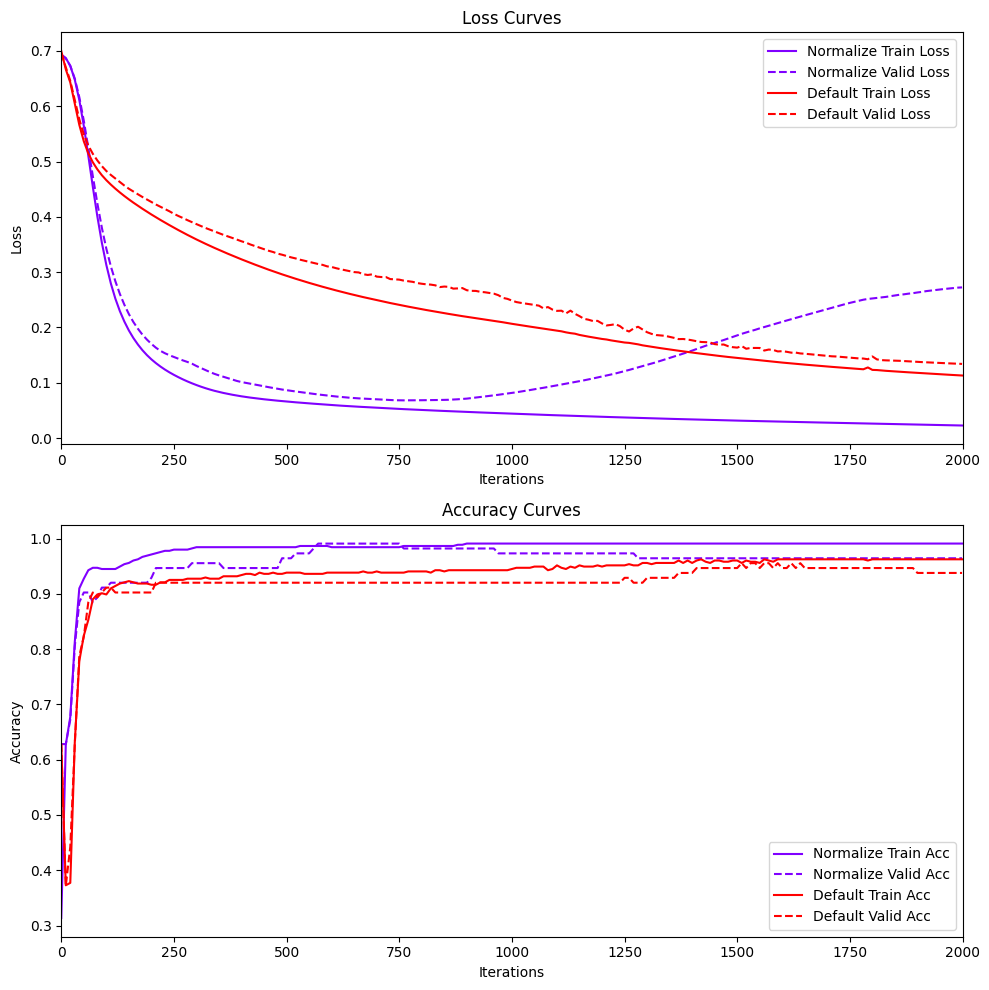

In [7]:

max_itr = 2000
models_results = []
for apply_normalize in [True, False]:
    if apply_normalize:
        name = "Normalize"
    else:
        name = "Default"

    X, y = get_ndarray(
        wdbc_csv_path="../data/data.csv",
        y_onehot=True,
        drop_id=True,
        apply_normalize=apply_normalize,
    )
    
    test_size = 0.2
    shuffle = False
    random_state = 42
    X_train, X_valid, t_train, t_valid = train_test_split(
        X=X,
        y=y,
        test_size=test_size,
        shuffle=shuffle,
        random_state=random_state,
        stratify=True,
    )
    
    model = Sequential(
        layers=[
            Dense(in_features=30, out_features=5, activation=ReLU, init_method=normal, seed=seed),
            Dense(in_features=5, out_features=2, activation=Softmax, init_method=normal, seed=seed)
        ],
        criteria=CrossEntropyLoss,
        optimizer=Adam(lr=0.001),
    )

    print(f"\ntrain {name}")
    iterations, train_losses, train_accs, valid_losses, valid_accs = train_model(
        model=model,
        X_train=X_train,
        t_train=t_train,
        X_valid=X_valid,
        t_valid=t_valid,
        iters_num=max_itr,
        verbose=False,
        plot=False,
        metrics_interval=10,
        name="WDBC"
    )

    models_results.append({
        'name'          : name,
        'iterations'    : iterations,
        'train_losses'  : train_losses,
        'train_accs'    : train_accs,
        'valid_losses'  : valid_losses,
        'valid_accs'    : valid_accs
    })


plot_multiple_models(max_itr, models_results)
